# Final

# Regression: Predicting the global land temperature of the Earth in 2050 from the past data via the maximum likelihood approach

In [1]:
ls

Final.ipynb                usaTemperatureHistory.txt


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

/Users/karennavarro/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
data=pd.read_csv('usaTemperatureHistory.txt', sep='\t')

In [4]:
data

,Year,Month,Anomaly,Unc.,Anomaly.1,Unc..1,Anomaly.2,Unc..2,Anomaly.3,Unc..3,Anomaly.4,Unc..4
0,1743,11,-1.131,2.118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1743,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1744,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1744,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1744,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3234,2013,5,0.813,0.087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3235,2013,6,1.088,0.109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3236,2013,7,0.671,0.094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3237,2013,8,0.919,0.134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str), format='%Y-%m')

<function matplotlib.pyplot.show(*args, **kw)>

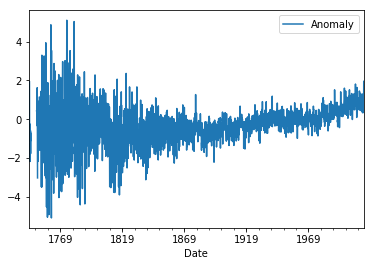

In [6]:
data.plot(x='Date', y='Anomaly')
plt.show

/Users/karennavarro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/karennavarro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/karennavarro/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/karennavarro/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensiona

<function matplotlib.pyplot.show(*args, **kw)>

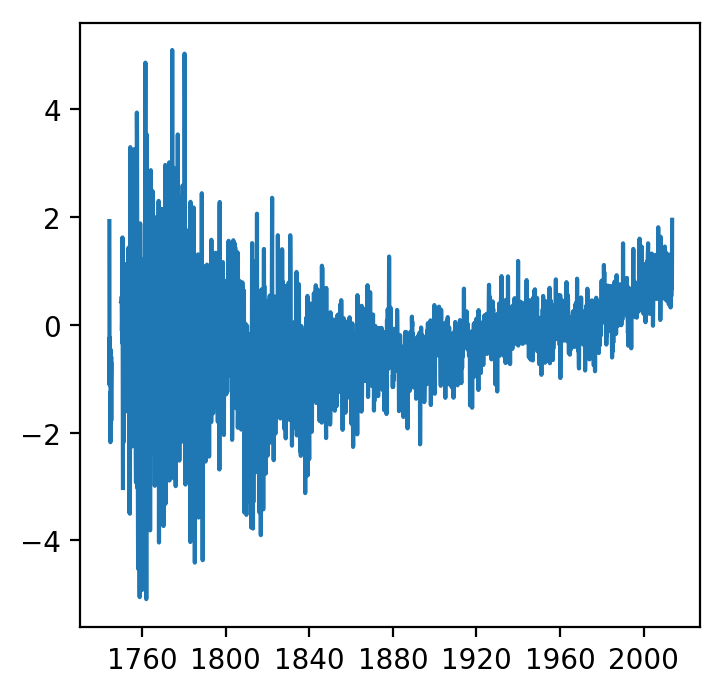

In [7]:
plt.figure(figsize=(4,4), dpi=200)

plt.plot(data['Date'], data['Anomaly'])
plt.show

In [8]:
date_str = data['Year'].astype(str) + '-' + data['Month'].astype(str)
date_np = np.array(pd.to_datetime(date_str, format='%Y-%m'))
date_np

array(['1743-11-01T00:00:00.000000000', '1743-12-01T00:00:00.000000000',
       '1744-01-01T00:00:00.000000000', ...,
       '2013-07-01T00:00:00.000000000', '2013-08-01T00:00:00.000000000',
       '2013-09-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [9]:
temp = np.array(data['Anomaly'])
temp

array([-1.131,    nan,    nan, ...,  0.671,  0.919,  1.95 ])

<function matplotlib.pyplot.show(*args, **kw)>

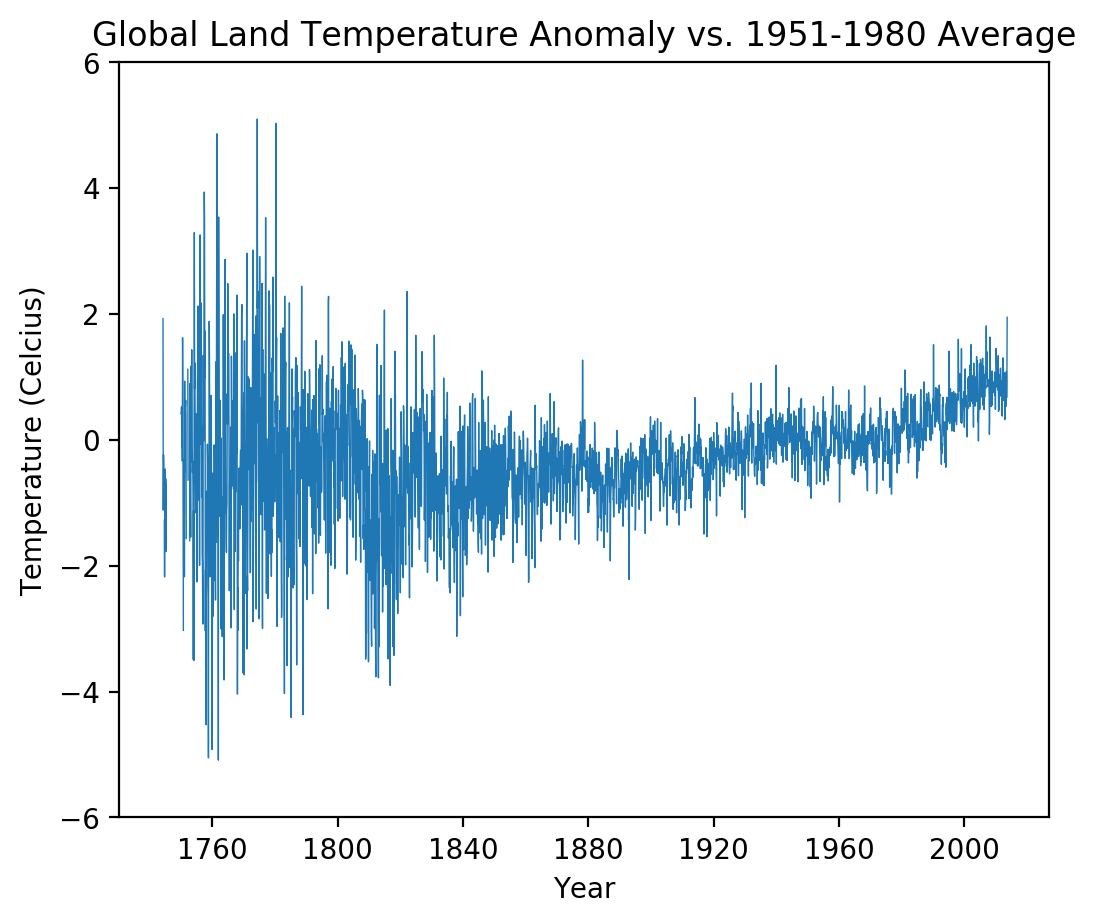

In [10]:
plt.figure(figsize=(6,5), dpi=200)

plt.plot(date_np, temp, '-', linewidth=.5)
plt.ylim(-6,6)
plt.xlabel('Year')
plt.ylabel('Temperature (Celcius)')
plt.title('Global Land Temperature Anomaly vs. 1951-1980 Average')

plt.show

In [11]:
#Going to reread everything again
data = pd.read_csv('usaTemperatureHistory.txt', delim_whitespace=True)
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str), format='%Y-%m')

#1970 to 2013
data = data.loc[(data['Year'] >= 1970) & (data['Year'] <= 2013), :]

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [12]:
# fit linear regression to 1970 to 2013
X = data['Date'].astype(int)
slope, intercept, r_value, p_value, std_err = stats.linregress(X, data['Anomaly'])


/Users/karennavarro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [13]:
# extrapolate
y_pred = intercept + slope * X

/Users/karennavarro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/karennavarro/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/karennavarro/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/karennavarro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-

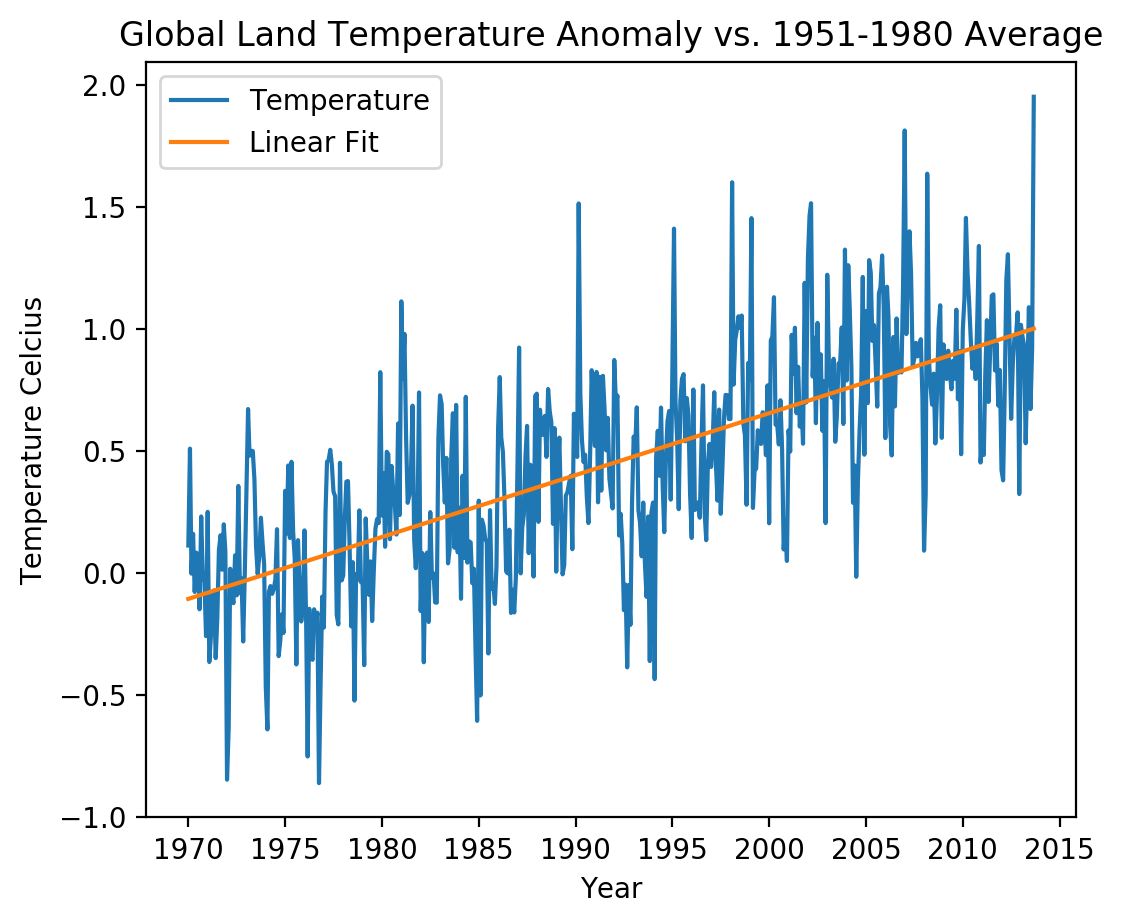

In [14]:
# Plot the data and the linear fit
#fig = plt.figure(figsize=(6,5), dpi=200)
fig, ax = plt.subplots(figsize=(6,5), dpi=200)

ax.plot(data['Date'], data['Anomaly'], label='Temperature')
ax.plot(data['Date'], y_pred, label='Linear Fit')

ax.set_xlabel('Year')
ax.set_ylabel('Temperature Celcius')
plt.title('Global Land Temperature Anomaly vs. 1951-1980 Average')
ax.legend()

plt.show()

In [15]:
# extrapolating to 2050
# time : 2050-01-01
year_2050 = pd.Timestamp('2050-01-01').to_datetime64().astype(int)
temp_2050 = intercept + slope * year_2050

print(f"Predicted temperature-anomaly in 2050: {temp_2050:.4f} Celcius")


Predicted temperature-anomaly in 2050: 1.9217 Celcius
